# Seattle Airbnb data analyzed : what makes a home popular?

## Part 1: Business understanding

#### In this project, Seattle Airbnb data were analyzed to uncover trend in popular listings in Seattle area. The project has three objectives.

1. Is airbnb rating informative?
2. What features do popular homes share?
3. As airbnb hosts, what canwe do to improve our home?

## Part 2: Data understanding

#### Let's take a look at the data. First, import libraries needed for the project.

In [73]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
listing = pd.read_csv('listings.csv')

In [3]:
listing.columns # see what features are in the dataset

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [109]:
listing.head(5) # take a quick look at the data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Airbnb provided information regarding listings, review and calendar in Seattle area. In this project, we will be
focusing on the listings data.

## Part 3: Data preparation

#### In this part, data will be selected, cleaned, inputed and organized in order for further analysis.

In [4]:
# For more concise analysis, only include features that are most relevant and interesting

listing_less = listing[['host_response_time','host_response_rate', 'host_acceptance_rate','host_is_superhost',
                        'host_total_listings_count','host_has_profile_pic', 'host_identity_verified','neighbourhood', 
                        'neighbourhood_cleansed','neighbourhood_group_cleansed', 'zipcode',
                        'is_location_exact', 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 
                        'beds', 'bed_type', 'amenities', 'square_feet','price', 'weekly_price', 'monthly_price', 
                        'security_deposit','cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                        'maximum_nights','availability_30', 'availability_60', 
                        'availability_90','availability_365', 'number_of_reviews','review_scores_rating',
                        'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 
                        'review_scores_communication','review_scores_location', 'review_scores_value', 
                        'requires_license','instant_bookable','cancellation_policy', 'require_guest_profile_picture',
                        'require_guest_phone_verification', 'calculated_host_listings_count','reviews_per_month']].copy()

In [5]:
# check the dtypes of features
pd.merge(pd.DataFrame(listing_less.dtypes,columns=['datatype']).reset_index(),
         pd.DataFrame(pd.DataFrame(listing_less.iloc[0]).reset_index()),on='index')

,index,datatype,0
0,host_response_time,object,within a few hours
1,host_response_rate,object,96%
2,host_acceptance_rate,object,100%
3,host_is_superhost,object,f
4,host_total_listings_count,float64,3
5,host_has_profile_pic,object,t
6,host_identity_verified,object,t
7,neighbourhood,object,Queen Anne
8,neighbourhood_cleansed,object,West Queen Anne
9,neighbourhood_group_cleansed,object,Queen Anne


In [6]:
listing_less.zipcode.unique() # check unique zipcode

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [7]:
listing_less.zipcode.replace('99\n98122','98122',inplace=True) # fix an encoding error

In [8]:
# convert/transform strings to numeric

listing_less.price = listing_less.price.apply(lambda x: x if x is np.NAN else float(x[1:].replace(',','')))
listing_less.weekly_price = listing_less.weekly_price.apply(lambda x: x if x is np.NAN else float(x[1:].replace(',','')))
listing_less.monthly_price = listing_less.monthly_price.apply(lambda x: x if x is np.NAN else float(x[1:].replace(',','')))
listing_less.security_deposit = listing_less.security_deposit.apply(lambda x: x if x is np.NAN else float(x[1:].replace(',','')))
listing_less.host_response_rate = listing_less.host_response_rate.apply(lambda x: x if x is np.NAN else float(x[:-1]))
listing_less.host_acceptance_rate = listing_less.host_acceptance_rate.apply(lambda x: x if x is np.NAN else float(x[:-1]))
listing_less.cleaning_fee = listing_less.cleaning_fee.apply(lambda x: x if x is np.NAN else float(x[1:]))
listing_less.extra_people = listing_less.extra_people.apply(lambda x: x if x is np.NAN else float(x[1:]))

In [9]:
# see percentage of missing values in each feature column.
listing_less.isnull().mean().sort_values()

number_of_reviews                   0.000000
require_guest_profile_picture       0.000000
amenities                           0.000000
bed_type                            0.000000
availability_365                    0.000000
instant_bookable                    0.000000
calculated_host_listings_count      0.000000
accommodates                        0.000000
room_type                           0.000000
requires_license                    0.000000
price                               0.000000
is_location_exact                   0.000000
neighbourhood_group_cleansed        0.000000
neighbourhood_cleansed              0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
availability_30                     0.000000
availability_60                     0.000000
require_guest_phone_verification    0.000000
availability_90                     0.000000
guests_included                     0.000000
cancellati

In [24]:
np.percentile(np.array(listing_less.isnull().mean()),95)  # check the outlier of missing percentage

0.4962807752750129

In [25]:
# drop features with more than 50% missing values.
listing_less = listing_less.drop(['security_deposit','monthly_price','square_feet'],axis=1)

In [36]:
# Imputation on columns with less than 40% missing values.
# Code modified from https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
# Basically, categorical variables imputed with most frequent value and numerical variables imputed with mean.

class DataFrameImputer(TransformerMixin):
    '''
    This class is for missing data imputation based on TransformerMixin.
    
    Specifically, categorical variables will be imputed with most frequent value and 
    and numerical variables imputed with mean.  
    
    Parameters:
    X: Series or DataFrame
    
    returns:
    Series or DataFrame with missing data filled.
    '''
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        '''
        This function is used to fit the series with missing values.
        X: dataframe or series.
        '''
        
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)

        return self

    def transform(self, X, y=None):
        '''
        This function is used to fill the missing data with frequent value or mean.
        '''
        return X.fillna(self.fill)

In [37]:
# impute values using function above

df = DataFrameImputer().fit_transform(listing_less)
df2 = df.copy()

In [38]:
# get dummy variables for categorical features

df2 = pd.get_dummies(df2, columns=['neighbourhood','neighbourhood_cleansed',
                             'neighbourhood_group_cleansed','zipcode','is_location_exact',
                             'property_type','room_type','bed_type',
                             'host_is_superhost','host_has_profile_pic','host_identity_verified',
                             'is_location_exact','requires_license','instant_bookable',
                             'require_guest_profile_picture','require_guest_phone_verification'])

In [39]:
print(df2.host_response_time.unique())
print(df2.cancellation_policy.unique())

['within a few hours' 'within an hour' 'within a day' 'a few days or more']
['moderate' 'strict' 'flexible']


In [40]:
# transform ordinal categorical features

mapper1 = {'within an hour':0, 'within a few hours':1, 'within a day':2, 'a few days or more':3}
df2['host_response_time'] = df2['host_response_time'].replace(mapper1)
df2['host_response_time'] = pd.factorize(df2['host_response_time'])[0]

mapper2 = {'flexible':0, 'moderate':1, 'strict':2}
df2['cancellation_policy'] = df2['cancellation_policy'].replace(mapper2)
df2['cancellation_policy'] = pd.factorize(df2['cancellation_policy'])[0]

In [41]:
df2.shape

(3818, 284)

## Part 4: Modeling

#### In this part, I will use machine learning algorithm to examine key features of popular listings.

Next, I will run a random forest regressor to see what features are important for popularity of the house/apt in Seattle. Here I will use reviews per month, instead of total number of reviews, as an indicator of popularity, since the number of reviews is heavily dependent on how long the hosts have been renting the house/apt. Therefore, in order not to be biased by this factor, I will use the reviews per month as target.

In [32]:
X = df2.drop(['reviews_per_month','amenities'],axis=1) # amenities will be analyzed later
y = df2['reviews_per_month']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

rf = RandomForestRegressor(random_state=0)
parameters = {'n_estimators': [300, 400, 500],
               'max_depth': [20, 30, 40],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2]}

grid = GridSearchCV(estimator = rf, param_grid = parameters, cv = 5)

In [19]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300, 400, 500], 'max_depth': [20, 30, 40], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [21]:
# see 5 most important features that contribute to number of reviews per month

importance_t = pd.DataFrame(data=[X.columns,grid.best_estimator_.feature_importances_]).T
importance_t.columns = ['feature','importance']
importance_t.sort_values(by='importance',ascending=False)[:5]

,feature,importance
18,number_of_reviews,0.443251
12,minimum_nights,0.065653
9,cleaning_fee,0.0334445
14,availability_30,0.0327587
8,price,0.0304142


Apparently, house/apt with more monthly reviews have more total reviews! Besides, we can see that price is an important factor for popularity (which is again not very surprising). For most of the properties, cleaning fee is  included in the price, so the higher the cleaning fee, the higher the price. Therefore, it makes sense both the price and cleaning fee are on top 5 list. 30 day-availability also play a key role in popularity. We will check out these features using some graphs below!

## Part 5: Evaluation

#### Finally, in this part we will visualize key features to take a deeper look at the modeling results. In addition, we will also look at features that are not considered as key factors associated with popularity of the listings.

In [105]:
# A few functions for making plots

def get_dist(var,cl,xlabel=None,ylabel=None,title=None):
    '''
    This function returns a distribution plot.
    var: array or series
    cl: color of the plot
    '''
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)    
    var.hist(bins=30,color=cl)



def get_scatter(x,y,cl,xlabel=None,ylabel=None,title=None):
    '''
    This function returns a scatterplot. 
    cl: color of the plot
    '''
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)    
    plt.scatter(x,y,color=cl)
    
    
def get_count(x,pal,title='',h=None, ho=None, o=None):
    '''
    This function returns a countplot.
    pal: palette
    h: hue
    ho: hue order
    o: order
    '''
    sns.countplot(x,palette=pal,hue=h,hue_order=ho)
    plt.title(title)
    
    
def get_bar(x,y,pal,title='',h=None):
    '''
    This function returns a bar plot.
    pal: palette
    h: hue
    '''
    sns.barplot(x,y,palette=pal,hue=h)
    plt.title(title)

### Q1: Is airbnb rating informative?

Average review rating: 94.53926206244176


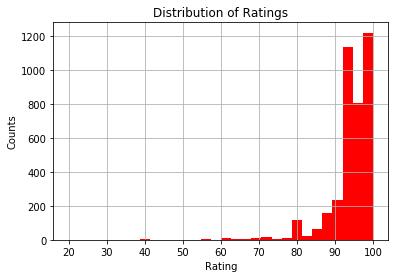

In [93]:
# Let's first see the distrinution of the overall ratings.
get_dist(df.review_scores_rating,'red','Rating','Counts','Distribution of Ratings');
print('Average review rating:', df.review_scores_rating.mean())

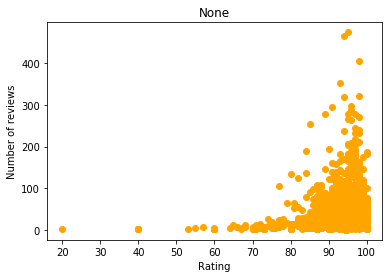

In [94]:
# Relationship between rating and the number of reviews
get_scatter(df.review_scores_rating,df.number_of_reviews,'orange','Rating','Number of reviews');

Let's go back to the first step that I decided to use number of reviews per month as the indicator for popularity instead of total sales (which we do not have info about) or overall rating. Here is a brief explanation of why I did not use the rating score as the target for my random forest regressor. As we can see from the rating distribution as well as average score (94.5) above, the rating itself is not a very good indication of popularity/satisfaction for the house/apt because people tend to be very generous about the ratings they gave. Therefore, I came up with a new indicator of the popularity, which is the number of reviews received each month. If we assume most people leave good ratings along with written reviews (as we see from the rating distribution), it is reasonable to believe that properties with lots of reviews are the ones that are nice and popular. 

### Q2: What features do popular homes share?

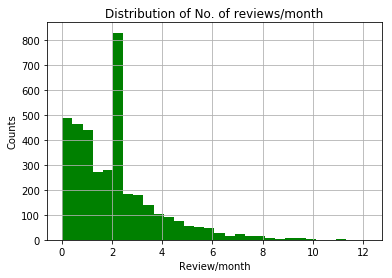

In [95]:
get_dist(df.reviews_per_month,'green','Review/month','Counts','Distribution of No. of reviews/month');

It looks like monthly review is distributed between 0 and 12, with a great number of properties having about 2 reviews per month.

In order to simplify visualization of the relationship between popularity and other features, I will divide all 
properties into 3 groups according to their popularity (reviews per month). The division will be made based on 
percentiles, therefore there will be equal (or very similar if not) number of properties in each groups. 

In [96]:
# the properties were divided into 3 groups based on their popularity (reviews they got per month)

df['popularity'] = pd.qcut(df['reviews_per_month'],3,labels=['low','medium','high'])

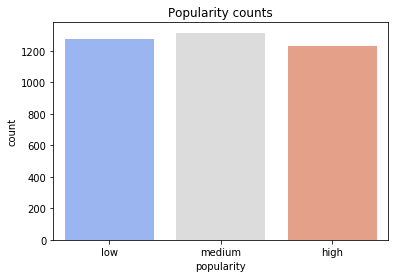

In [97]:
get_count(df.popularity,'coolwarm','Popularity counts')

Now we have three popularity groups. Next, let's look at one of the important feature we discovered from random forest feature importance analysis - minimum nights required for stay.

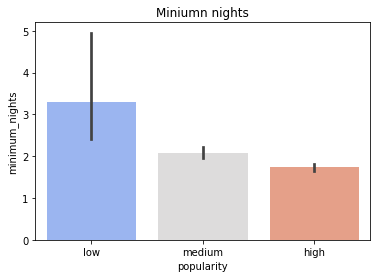

In [98]:
get_bar(df.popularity,df.minimum_nights,'coolwarm','Miniumn nights');

The ones with lowest popularity require longest minimum stay (with a huge error bar though), suggesting that people
prefer flexible policy on their stay.

Next, let's see the price for each popularity type.

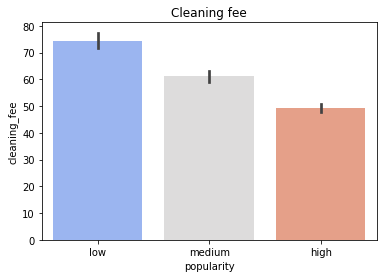

In [99]:
get_bar(df.popularity,df.cleaning_fee,'coolwarm','Cleaning fee');

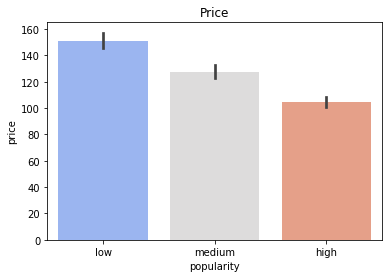

In [76]:
get_bar(df.popularity,df.price,'coolwarm','Price');

Interestingly, we can see a clear pattern here that people like to rent house/apt with low price.

Then how about availability?

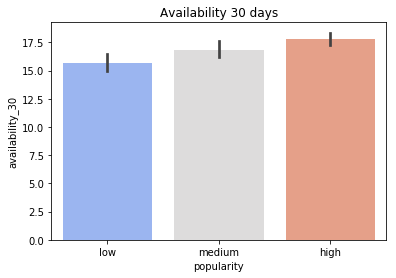

In [77]:
get_bar(df.popularity,df.availability_30,'coolwarm','Availability 30 days');

Of course, not all properties are available for entire month for rent because some people only rent their house/apt when they are not around. And it makes sense that these type of properties received less reviews because they had less guests/visits. Thus, it is hard to know for what reason the properties were not available (could be already rent out or just not available), but there is a slight trend that they are more popular if they have greater availability.

Next, we assumed that most listings on airbnb website generally received good ratings regardless of their popularity. But is it really that case?

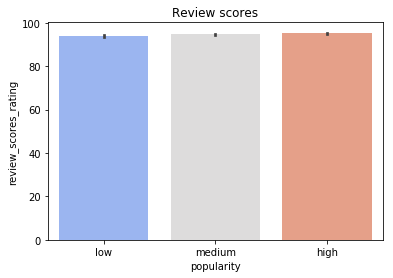

In [83]:
get_bar(df.popularity,df.review_scores_rating,'coolwarm','Review scores');

Yes, it is!!! So hosts, please keep in mind that number of reviews is more important than scores, so try your best to increase the number of reviews and convince every visitor to leave a review after their stay!

However, there is a trap in this review system. You'll make a huge mistake if you think rating is not important! Hosts have been complaining about the airbnb rating system. Here's an example.  https://community.withairbnb.com/t5/Host-Voice/Agreed-Airbnb-s-rating-system-kinda-sucks/idi-p/573267

Basically, because everyone's rating is so high, just one bad rating and review (especially when you don't have a lot of reviews yet) can dramatically change the 'level' of your property and therefore airbnb will probably give you warning for 'low' scores that indeed is not a bad score at all. Thus I personally think that number of reviews and rating are equally important for hosts.

Next, let's explore some features that are not on the top 5 list.

### Q3: As a host, room type and price is not what I can control. What else can I do to improve my home?

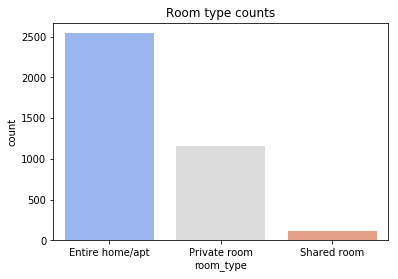

In [79]:
get_count(df.room_type,'coolwarm','Room type counts');  # see what type of room people prefer

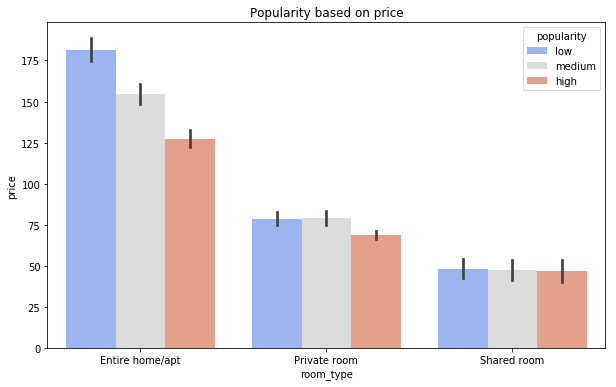

In [100]:
plt.figure(figsize=(10,6))
get_bar(df.room_type,df.price,'coolwarm','Popularity based on price',h=df.popularity);

From these two graphs, we can see that most of the listings are entire home or apartment. Interestingly, from the 
second graph left panel we can see that low-price entire home/apt are most popular and high-price entire home/apt are 
least popular. This indicates that most people prefer cheap but private place. 

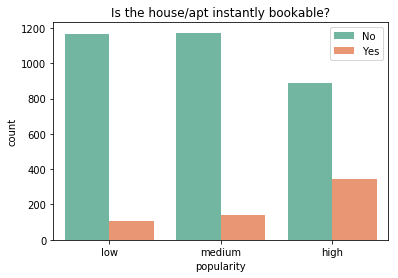

In [101]:
get_count(df.popularity,'Set2','Is the house/apt instantly bookable?',h=df.instant_bookable)
plt.legend(['No','Yes']);

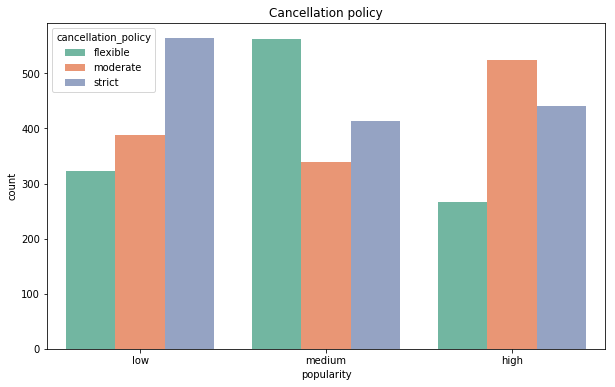

In [102]:
plt.figure(figsize=(10,6))
get_count(df.popularity,'Set2','Cancellation policy',h=df.cancellation_policy,ho=['flexible','moderate','strict']);

Instant booking and cancellation policies were also examined. The properties with high popularity are open to
instant bookings more than other properties, and their cancellation polity is moderate.

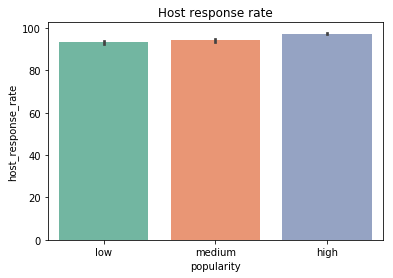

In [107]:
get_bar(df.popularity,df.host_response_rate,'Set2','Host response rate');

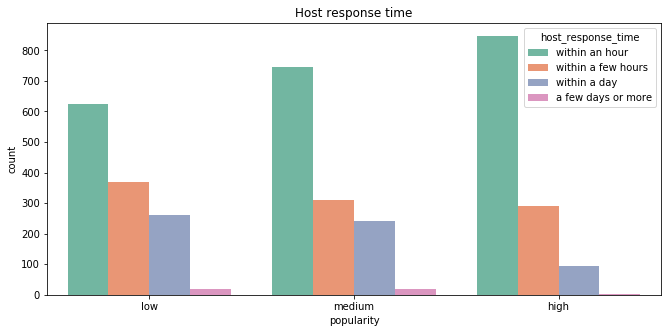

In [106]:
plt.figure(figsize=(11,5))
get_count(df.popularity,'Set2','Host response time',h=df.host_response_time,
          ho=['within an hour','within a few hours','within a day','a few days or more'],
          o=['high','medium','low']);

Properties in popularity groups tend to show similar response rate but slightly different response time. Most of the
hosts do indeed respond within an hour of the inquiry, but the popular properties are more likely to do so than other
properties.

Finally, let's look at some popular amenities provided in the properties.

In [30]:
df.amenities[0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [31]:
# see most popular amenities

df.amenities = df.amenities.apply(lambda x: x if x is np.NAN else x[1:-1].replace('"','').split(','))

from collections import Counter
df.ame_counts = df.amenities.apply(lambda x: Counter(x))

items = Counter()
for item in df.ame_counts:
    items = items + item
    
pd.DataFrame.from_dict(items, orient='index').sort_values(0,ascending=False)[:15]

,0
Wireless Internet,3667
Heating,3627
Kitchen,3423
Smoke Detector,3281
Essentials,3237
Dryer,2997
Washer,2992
Internet,2811
Shampoo,2670
TV,2574


The top 15 popular amaneties are listed above. Some are really basic, such as internet and smoke detector, while some
are not easily seen in a regular hotel, for example the first aid kit.

## Conclustion

In summary, in this notebook, I tried to analyze what makes an airbnb property popular than others. Like I mentioned earlier, the sales would have been the best measure in the analysis; but unfortunately, there is no easy and straitforward way to calculate the sales from given dataset (I might be wrong, correct me if there is a way to do so). Therefore, I used the number of reviews each month to see what differs the popular properties from others.

I first examined important features using feature importance analysis in random forest regressor, and used some graphs to visualize these features. Then I also looked at some other features that might be helpful for future improvement for the hosts.

This analysis primarily focuses on features that can be improved/upgraded by the hosts, and this is why I did not include analysis about the neigbourhood etc. You can't just move to a popular neigbourbood because it's popular, right?

Finally, I am a data enthusiast who just started to learn ds skills and coding, so any feedback is greatly appreciated!